In [507]:
import pandas as pd
import os
import math
from sklearn import linear_model
import numpy as np
import seaborn as sns

TCGA_data_1 = pd.read_csv('TCGA_data_1')
TCGA_data_2 = pd.read_csv('TCGA_data_2')
TCGA_data_3 = pd.read_csv('TCGA_data_3')

def disp_hist(dataframe,col_names):
'''
Dataframe is a pandas dataframe, col_names is a list containing strings corresponding
to the columns to create histograms of
Does not return an object, just displays histograms
'''
    for i in col_names:
        hist = dataframe.hist(column=i)
    
    
def disp_linear_models(dataframe,ind_var,dep_var):
'''
Dataframe is a pandas dataframe, ind_var is a list containing column names of independent variables
corresponding to x values of linear model, dep_var is a list contianing column names of dependent variable
corresponding to y values of linear model
Does not return an object,just displays linear models
'''
    for i in ind_var:   
        sns.lmplot(x=i,y=dep_var,data=dataframe,fit_reg=True) 
        
        
def df_to_numeric(dataframe,col_names,save_drops=False):
'''
Dataframe is a pandas dataframe, col_names is a list containing strings corresponding to column
that you to drop non-numeric elements of, save_drops will output the number of dropped rows in list format
Returns dataframe containing the dataframe with nonnumerics filtered, and columns in numeric number format
'''
    before_rows = len(dataframe.index)
    for i in col_names:
        asnumeric = pd.to_numeric(dataframe[i],errors="coerce")
        dataframe["asnumeric"] = asnumeric
        dataframe = dataframe.dropna()
        dataframe = dataframe.drop("asnumeric",axis=1)
        dataframe[i] = pd.to_numeric(dataframe[i])
    
    after_rows = len(dataframe.index)
    rows_diff = before_rows-after_rows
    
    print("Original row count:",before_rows)
    print("New row count:",after_rows)
    print("Dropped",rows_diff,"rows")
    
    if save_drops == True:
        return(dataframe,before_rows,after_rows,rows_diff)
    else:
        return(dataframe)


def generate_mlr(dataframe,ind_var,dep_var):
'''
Dataframe is a pandas dataframe, ind_var is a list containing strings of the independent variable columns, 
dep_var is a list containing strings of the dependent variable columns
Returns a list of an array and dictionary which labels the coefficients of each independent variable on linear model of the dependent variable
'''
    coef_dict = {}
    X = dataframe[ind_var]
    y = dataframe[dep_var]
    reg = linear_model.LinearRegression()
    reg_fitted = reg.fit(X,y) #fitted regression object
    coeff_array = reg_fitted.coef_
    coeff_dict = dict(zip(ind_var,reg_fitted.coef_.tolist()[0])) #0 refers to the first element of the resultant list
    results = [coeff_array,coeff_dict]
    return(results)


def convert_stage_number(dataframe,col_name):
'''
Dataframe is a pandas dataframe and col_name is the string of the column name that
you want to convert from stage number to numerical
Returns dataframe with additional column "stage_number" which is the stage number
in numeric format
'''
    stage_dict = {"Stage I":1,"Stage II":2,"Stage III":3,"Stage IV":4}
    dataframe["stage_number"] = dataframe[col_name].map(stage_dict)
    dataframe = df_to_numeric(dataframe,["stage_number"],save_drops=False)
    dataframe = dataframe.astype({"stage_number":int})
    return(dataframe)


Original row count: 539
New row count: 534
Dropped 5 rows


,Unnamed: 0,X,bcr_patient_uuid,bcr_patient_barcode,form_completion_date,histologic_diagnosis,gender,birth_days_to,race,ethnicity,ajcc_pathologic_tumor_stage,vital_status,death_days_to,stage_number
2,3,3,2B1DEA0A-6D55-4FDD-9C1C-0D9FBE03BD78,TCGA-3Z-A93Z,2014-11-11,Kidney Clear Cell Renal Carcinoma,MALE,-25205,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Stage I,Alive,[Not Applicable],1
3,4,4,D3B47E53-6F40-4FC8-B5A4-CBE548A770A9,TCGA-6D-AA2E,2014-3-17,Kidney Clear Cell Renal Carcinoma,FEMALE,-25043,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Stage I,Alive,[Not Applicable],1
4,5,5,9fb55e0b-43d8-40a3-8ef2-d198e6290551,TCGA-A3-3306,2010-8-23,Kidney Clear Cell Renal Carcinoma,MALE,-24569,WHITE,NOT HISPANIC OR LATINO,Stage I,Alive,[Not Applicable],1
5,6,6,7ac1d6c6-9ade-49af-8794-10b5b96b2b05,TCGA-A3-3307,2010-4-13,Kidney Clear Cell Renal Carcinoma,MALE,-24315,[Not Available],[Not Available],Stage III,Alive,[Not Applicable],3
6,7,7,3cbca837-f5a7-4a87-8f02-c59eac232d5a,TCGA-A3-3308,2010-4-12,Kidney Clear Cell Renal Carcinoma,FEMALE,-28287,WHITE,[Not Available],Stage III,Alive,[Not Applicable],3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,534,534,0DF9EC46-D600-4845-9D00-2DC2732C68D1,TCGA-GK-A6C7,2013-11-26,Kidney Clear Cell Renal Carcinoma,FEMALE,-28107,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Stage I,Alive,[Not Applicable],1
535,536,536,620BAEFA-DB8F-4AF9-9101-4B9B252FA73E,TCGA-MM-A564,2013-6-14,Kidney Clear Cell Renal Carcinoma,MALE,-24916,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Stage II,Alive,[Not Applicable],2
536,537,537,AA2B6825-3352-4D47-A637-48452F4A958B,TCGA-MM-A84U,2014-1-14,Kidney Clear Cell Renal Carcinoma,FEMALE,-21375,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Stage I,Alive,[Not Applicable],1
537,538,538,B123E7C1-2472-4427-BFEB-79666F971E66,TCGA-MW-A4EC,2013-3-6,Kidney Clear Cell Renal Carcinoma,FEMALE,-26649,BLACK OR AFRICAN AMERICAN,HISPANIC OR LATINO,Stage I,Alive,[Not Applicable],1


Original row count: 539
New row count: 161
Dropped 378 rows
Original row count: 161
New row count: 160
Dropped 1 rows


[array([[ 1.37603354e-02, -1.86708297e+02]]),
 {'birth_days_to': 0.013760335434963054, 'stage_number': -186.7082973689678}]

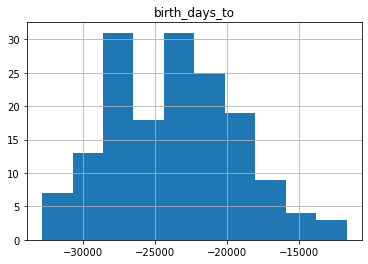

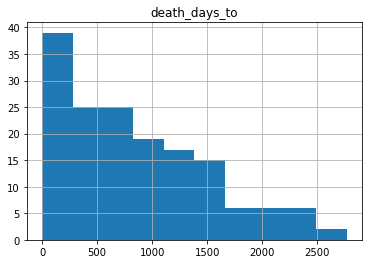

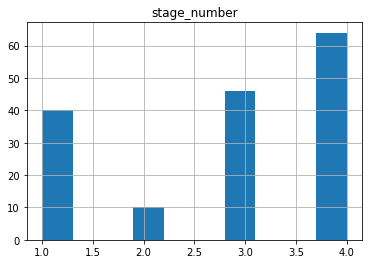

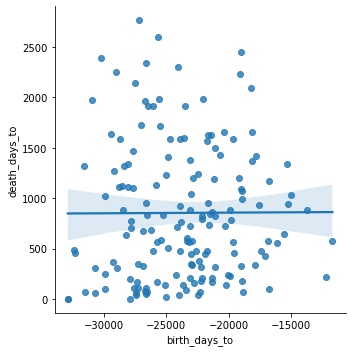

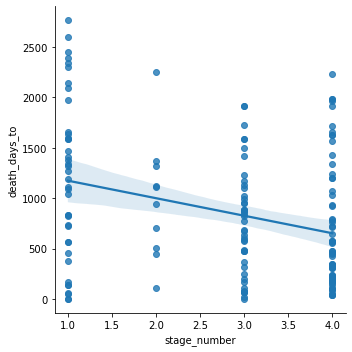

In [574]:
TCGA_data_1 = pd.read_csv('TCGA_data_1')

TCGA_data_1 = df_to_numeric(TCGA_data_1,col_names=["birth_days_to","death_days_to"])

TCGA_data_1 = convert_stage_number(TCGA_data_1,"ajcc_pathologic_tumor_stage")

disp_hist(TCGA_data_1,col_names=["birth_days_to","death_days_to","stage_number"])

disp_linear_models(TCGA_data_1,["birth_days_to","stage_number"],"death_days_to")
    
generate_mlr(TCGA_data_1,ind_var=["birth_days_to","stage_number"],dep_var=["death_days_to"])
